In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import stripROtools
from stripROtools import colors


# Gain stability

In [2]:
# Read PHA data
df_UHDLC = pd.read_csv("/Users/majdghrear/data/VMM3a_SRS/PHA_data/PHA_data-Gain_stability_UH_DLC.csv")
df_UHNoDLC = pd.read_csv("/Users/majdghrear/data/VMM3a_SRS/PHA_data/PHA_data-Gain_stability_UH_NoDLC.csv")
df_UoS = pd.read_csv("/Users/majdghrear/data/VMM3a_SRS/PHA_data/PHA_data-Gain_stability_UoS.csv")

In [3]:
# Fit PHA data
coeff_UHDLC, covar_UHDLC = curve_fit(stripROtools.exp_plat, df_UHDLC.Time,df_UHDLC.Gmean, p0=(5000, 0.1, 5))
coeff_UHNoDLC, covar_UHNoDLC = curve_fit(stripROtools.exp_plat, df_UHNoDLC.Time,df_UHNoDLC.Gmean, p0=(5000, 0.1, 5))
coeff_UoS, covar_UoS = curve_fit(stripROtools.exp_plat, df_UoS.Time,df_UoS.Gmean, p0=(5000, 0.1, 5))

# Compute fit errors
perr_UHDLC = np.sqrt(np.diag(covar_UHDLC))
perr_UHNoDLC = np.sqrt(np.diag(covar_UHNoDLC))
perr_UoS = np.sqrt(np.diag(covar_UoS))

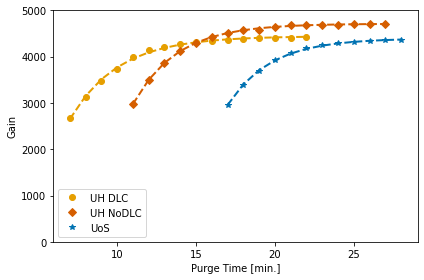

In [6]:
# Plot the data and fits

plt.plot(df_UHDLC.Time,df_UHDLC.Gmean, marker = "o", color = colors['orange'], linestyle='None',label = "UH DLC")
fit_UHDLC = stripROtools.exp_plat(df_UHDLC.Time,*coeff_UHDLC)
plt.plot(df_UHDLC.Time, fit_UHDLC, linestyle ='--', color =colors['orange'],linewidth=2)


plt.plot(df_UHNoDLC.Time,df_UHNoDLC.Gmean, marker = "D", color = colors['red'], linestyle='None',label = "UH NoDLC")
fit_UHNoDLC = stripROtools.exp_plat(df_UHNoDLC.Time,*coeff_UHNoDLC)
plt.plot(df_UHNoDLC.Time, fit_UHNoDLC, linestyle ='--', color = colors['red'], linewidth=2)


plt.plot(df_UoS.Time,df_UoS.Gmean, marker = "*", color = colors['blue'], linestyle='None',label = "UoS")
fit_UoS = stripROtools.exp_plat(df_UoS.Time,*coeff_UoS)
plt.plot(df_UoS.Time, fit_UoS, linestyle ='--', color = colors['blue'], linewidth=2)


plt.legend()
plt.ylabel("Gain")
plt.xlabel("Purge Time [min.]")
plt.ylim(0,5000)
plt.tight_layout()

plt.savefig("./figures/gain_stability.pdf")


In [7]:
# Calculate how far into the plateau each detector is at the final gain measurement
print("UH DLC: ", 1-np.exp(-coeff_UHDLC[1]*(np.max(df_UHDLC.Time)-coeff_UHDLC[2])))
print("UH NoDLC: ", 1-np.exp(-coeff_UHNoDLC[1]*(np.max(df_UHNoDLC.Time)-coeff_UHNoDLC[2])))
print("UoS: ", 1-np.exp(-coeff_UoS[1]*(np.max(df_UoS.Time)-coeff_UoS[2])))


UH DLC:  0.9969987517342771
UH NoDLC:  0.9988321286910666
UoS:  0.9944032560750613


# Gain versus Vmesh

In [8]:
df_UHDLC = pd.read_csv("/Users/majdghrear/data/VMM3a_SRS/PHA_data/PHA_data-Vmesh_UH_DLC.csv")
df_UHNoDLC = pd.read_csv("/Users/majdghrear/data/VMM3a_SRS/PHA_data/PHA_data-Vmesh_UH_NoDLC.csv")
df_UoS = pd.read_csv("/Users/majdghrear/data/VMM3a_SRS/PHA_data/PHA_data-Vmesh_UoS.csv")

In [9]:
# Fit PHA data
coeff_UHDLC, covar_UHDLC = curve_fit(stripROtools.linear, df_UHDLC.MeshVoltage,np.log(df_UHDLC.Gmean), p0=(0.03, 0))
coeff_UHNoDLC, covar_UHNoDLC = curve_fit(stripROtools.linear, df_UHNoDLC.MeshVoltage,np.log(df_UHNoDLC.Gmean), p0=(0.03, 0))
coeff_UoS, covar_UoS = curve_fit(stripROtools.linear, df_UoS.MeshVoltage,np.log(df_UoS.Gmean), p0=(0.03, 0))

# Compute fit errors
perr_UHDLC = np.sqrt(np.diag(covar_UHDLC))
perr_UHNoDLC = np.sqrt(np.diag(covar_UHNoDLC))
perr_UoS = np.sqrt(np.diag(covar_UoS))

print("UH DLC: a = ", coeff_UHDLC[0], "+/-", perr_UHDLC[0], ", b = ", coeff_UHDLC[1], "+/-", perr_UHDLC[1] )
print("UH NoDLC: a = ", coeff_UHNoDLC[0], "+/-", perr_UHNoDLC[0], ", b = ", coeff_UHNoDLC[1], "+/-", perr_UHNoDLC[1] )
print("UH UoS: a = ", coeff_UoS[0], "+/-", perr_UoS[0], ", b = ", coeff_UoS[1], "+/-", perr_UoS[1] )

UH DLC: a =  0.021885325161391744 +/- 8.78353398153998e-05 , b =  -5.619527058538973 +/- 0.056734876295659764
UH NoDLC: a =  0.020766070401929893 +/- 9.123077746531303e-05 , b =  -4.838105368022909 +/- 0.057057540379853895
UH UoS: a =  0.020552317283063705 +/- 2.029563968066534e-05 , b =  -9.285947168223535 +/- 0.018307372014086734


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


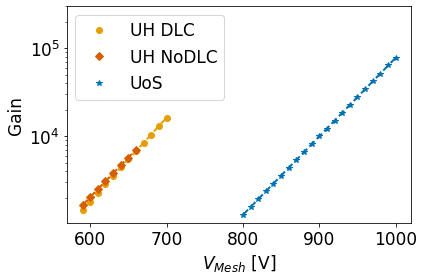

In [10]:
# Plot log(Gain) versus mesh voltage
plt.plot(df_UHDLC.MeshVoltage, df_UHDLC.Gmean, marker = "o", color = colors['orange'], linestyle='None',label = "UH DLC")
fit_UHDLC = np.exp(stripROtools.linear(df_UHDLC.MeshVoltage,*coeff_UHDLC))
plt.plot(df_UHDLC.MeshVoltage, fit_UHDLC, linestyle ='--', color = colors['orange'],linewidth=2)

plt.plot(df_UHNoDLC.MeshVoltage,df_UHNoDLC.Gmean, marker = "D", color = colors['red'], linestyle='None',label = "UH NoDLC")
fit_UHNoDLC = np.exp(stripROtools.linear(df_UHNoDLC.MeshVoltage,*coeff_UHNoDLC))
plt.plot(df_UHNoDLC.MeshVoltage, fit_UHNoDLC, linestyle ='--', color = colors['red'],linewidth=2)

plt.plot(df_UoS.MeshVoltage,df_UoS.Gmean, marker = "*", color = colors['blue'], linestyle='None',label = "UoS")
fit_UoS = np.exp(stripROtools.linear(df_UoS.MeshVoltage,*coeff_UoS))
plt.plot(df_UoS.MeshVoltage, fit_UoS, linestyle ='--', color = colors['blue'],linewidth=2)

plt.legend(fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.yscale("log")
plt.ylim(0,300000)
plt.ylabel("Gain",fontsize=17)
plt.xlabel("$V_{Mesh}$ [V]",fontsize=17)
plt.tight_layout()

plt.savefig("./figures/Mesh_V.pdf")


In [11]:
# Now fit all data simultaneously to the townsed eqn

# Add amplification gap in [m] to all dataframes
df_UHDLC["t"] = 128e-6*np.ones(len(df_UHDLC))
df_UHNoDLC["t"] = 128e-6*np.ones(len(df_UHNoDLC))
df_UoS["t"] = 2*128e-6*np.ones(len(df_UoS))

# Get y values for the fit
y_vals = np.log(df_UHDLC.Gmean.to_list() + df_UHNoDLC.Gmean.to_list() + df_UoS.Gmean.to_list())

# Get x values for the fit x = (V,t)
V_vals = np.array(df_UHDLC.MeshVoltage.to_list() + df_UHNoDLC.MeshVoltage.to_list() + df_UoS.MeshVoltage.to_list())
t_vals = np.array(df_UHDLC.t.to_list() + df_UHNoDLC.t.to_list() + df_UoS.t.to_list())

In [12]:
# Firt try regular Townsend gain equation
coeff, covar = curve_fit(stripROtools.townsend, (V_vals,t_vals), y_vals, bounds= ((-np.inf,-np.inf,0 ),(np.inf,np.inf,1) ), p0 =(60,60,0.5) )
perr = np.sqrt(np.diag(covar))

print(coeff)
print(perr)

[ 1.78700283 44.07127635  0.14688019]
[0.17145855 4.88831971 0.03504529]


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


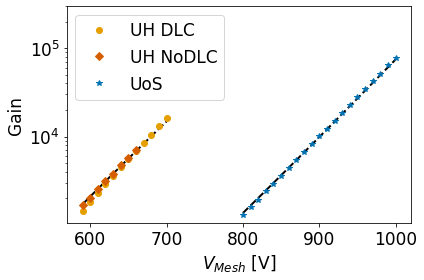

In [13]:
# Plot with data

V_vals2 = np.array(df_UHDLC.MeshVoltage.to_list()  + df_UoS.MeshVoltage.to_list())
t_vals2 = np.array(df_UHDLC.t.to_list() + df_UoS.t.to_list())


fit = np.exp(stripROtools.townsend( (V_vals2,t_vals2) ,*coeff))

plt.plot(V_vals2[0:len(df_UHDLC)], fit[0:len(df_UHDLC)], linestyle ='--', color = "k",linewidth=2)
plt.plot(V_vals2[len(df_UHDLC):], fit[len(df_UHDLC):], linestyle ='--', color = "k",linewidth=2)



plt.plot(df_UHDLC.MeshVoltage, df_UHDLC.Gmean, marker = "o", color = colors['orange'], linestyle='None',label = "UH DLC")
plt.plot(df_UHNoDLC.MeshVoltage,df_UHNoDLC.Gmean, marker = "D", color = colors['red'], linestyle='None',label = "UH NoDLC")
plt.plot(df_UoS.MeshVoltage,df_UoS.Gmean, marker = "*", color = colors['blue'], linestyle='None',label = "UoS")

plt.legend(fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.yscale("log")
plt.ylim(0,300000)
plt.ylabel("Gain",fontsize=17)
plt.xlabel("$V_{Mesh}$ [V]",fontsize=17)
plt.tight_layout()

plt.savefig("./figures/Townsend_fit.pdf")




# Sven's fit function

In [14]:
# townsend gain eqn fit function
def sven(X, a, E_o):

    V,t = X # V is the mesh voltage [V] and t is the amplifcation gap [m]

    return a*t*( (V/t) - E_o)



In [15]:
# Firt try regular Townsend gain equation
coeff, covar = curve_fit(sven, (V_vals,t_vals), y_vals)
perr = np.sqrt(np.diag(covar))

print(coeff)
print(perr)

[2.01426477e-02 1.73066257e+06]
[5.41677886e-05 5.80313766e+03]


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


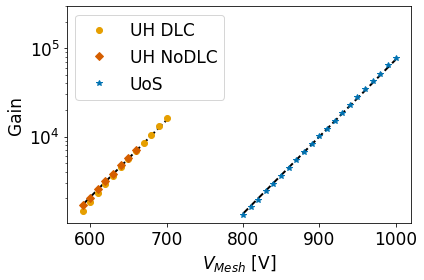

In [17]:
# Plot with data

V_vals2 = np.array(df_UHDLC.MeshVoltage.to_list()  + df_UoS.MeshVoltage.to_list())
t_vals2 = np.array(df_UHDLC.t.to_list() + df_UoS.t.to_list())


fit = np.exp(sven( (V_vals2,t_vals2) ,*coeff))

plt.plot(V_vals2[0:len(df_UHDLC)], fit[0:len(df_UHDLC)], linestyle ='--', color = "k",linewidth=2)
plt.plot(V_vals2[len(df_UHDLC):], fit[len(df_UHDLC):], linestyle ='--', color = "k",linewidth=2)



plt.plot(df_UHDLC.MeshVoltage, df_UHDLC.Gmean, marker = "o", color = colors['orange'], linestyle='None',label = "UH DLC")
plt.plot(df_UHNoDLC.MeshVoltage,df_UHNoDLC.Gmean, marker = "D", color = colors['red'], linestyle='None',label = "UH NoDLC")
plt.plot(df_UoS.MeshVoltage,df_UoS.Gmean, marker = "*", color = colors['blue'], linestyle='None',label = "UoS")

plt.legend(fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.yscale("log")
plt.ylim(0,300000)
plt.ylabel("Gain",fontsize=17)
plt.xlabel("$V_{Mesh}$ [V]",fontsize=17)
plt.tight_layout()

plt.savefig("./figures/Sven_fit.pdf")




# Grain res. versus gain

In [26]:
# Fit PHA data
coeff_UHDLC, covar_UHDLC = curve_fit(stripROtools.invs, df_UHDLC.Gmean, df_UHDLC.Gsigma/df_UHDLC.Gmean, p0=(0.02,0.1))
coeff_UHNoDLC, covar_UHNoDLC = curve_fit(stripROtools.invs, df_UHNoDLC.Gmean, df_UHNoDLC.Gsigma/df_UHNoDLC.Gmean, p0=(0.02,0.1))
coeff_UoS, covar_UoS = curve_fit(stripROtools.invs, df_UoS.Gmean, df_UoS.Gsigma/df_UoS.Gmean, p0=(0.02,0.1))

# Compute fit errors
perr_UHDLC = np.sqrt(np.diag(covar_UHDLC))
perr_UHNoDLC = np.sqrt(np.diag(covar_UHNoDLC))
perr_UoS = np.sqrt(np.diag(covar_UoS))

print("UH DLC: a = ", coeff_UHDLC[0], "+/-", perr_UHDLC[0], ", b = ", coeff_UHDLC[1], "+/-", perr_UHDLC[1] )
print("UH NoDLC: a = ", coeff_UHNoDLC[0], "+/-", perr_UHNoDLC[0], ", b = ", coeff_UHNoDLC[1], "+/-", perr_UHNoDLC[1] )
print("UH UoS: a = ", coeff_UoS[0], "+/-", perr_UoS[0], ", b = ", coeff_UoS[1], "+/-", perr_UoS[1] )


UH DLC: a =  204.51800046420573 +/- 4.257353703581607 , b =  0.1008434114372726 +/- 0.0011260674027720147
UH NoDLC: a =  324.7732408175495 +/- 3.9821692148888577 , b =  0.12607403294982783 +/- 0.001352314277680025
UH UoS: a =  140.4566408297035 +/- 4.4183347698625965 , b =  0.09726996470348123 +/- 0.0008607482190259484


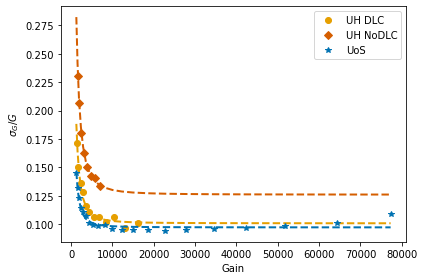

In [28]:
# Plot fractional gain resolution versus gain

x_vals = np.arange(5000,80000,5000)

plt.plot(df_UHDLC.Gmean,df_UHDLC.Gsigma/df_UHDLC.Gmean, marker = "o", color = colors['orange'], linestyle='None',label = "UH DLC")
fit_UHDLC = stripROtools.invs(df_UoS.Gmean,*coeff_UHDLC)
plt.plot(df_UoS.Gmean, fit_UHDLC, linestyle ='--', color = colors['orange'],linewidth=2)

plt.plot(df_UHNoDLC.Gmean,df_UHNoDLC.Gsigma/df_UHNoDLC.Gmean, marker = "D", color = colors['red'], linestyle='None',label = "UH NoDLC")
fit_UHNoDLC = stripROtools.invs(df_UoS.Gmean,*coeff_UHNoDLC)
plt.plot(df_UoS.Gmean, fit_UHNoDLC, linestyle ='--', color = colors['red'],linewidth=2)

plt.plot(df_UoS.Gmean,df_UoS.Gsigma/df_UoS.Gmean, marker = "*", color = colors['blue'], linestyle='None',label = "UoS")
fit_UoS = stripROtools.invs(df_UoS.Gmean,*coeff_UoS)
plt.plot(df_UoS.Gmean, fit_UoS, linestyle ='--', color = colors['blue'],linewidth=2)

plt.legend()
plt.ylabel("$ \sigma_G / G$")
plt.xlabel("Gain")
plt.tight_layout()

plt.savefig("./figures/Gain_res.pdf")

